In [15]:
## TEST OF SCATTERING SIMULATIONS
## 06-30-23

import numpy as np
from numpy import cos, sin, pi, sqrt, exp
import os
%matplotlib inline
import matplotlib;
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy
from scipy import signal
import pdb
import rebound


G = 6.674e-11
GM = 1.3271244004193938e+11
Msun = GM/G*1e9
Mjup = 1.266865349218008e+8/G*1e9
Mearth = 3.9860043543609598e5/G*1e9
year = 365.25*24*60*60
AU = (G*Msun*(year**2)/(4.*np.pi**2))**(1./3.)


In [19]:
## SIMULATION PARAMETERS

Mstar = 1.

# inner
a_in_arr = np.array([0.09646095, 0.11466631, 0.13630763, 0.16203337])
Mp_in_arr = np.array([2.21881507e-05, 1.49433180e-05, 1.01229512e-05, 1.36498254e-05])
e_in_arr = np.array([0.00401539, 0.03990216, 0.04898783, 0.00403324])
inc_in_arr = np.array([0.0129769,  0.00573305, 0.01147417, 0.00776187])

# outer
a_out_arr = np.array([0.31279969, 0.90587483, 2.62343358, 7.59752182])
Mp_out_arr = (1./10)*np.array([0.00608771, 0.00614068, 0.0062114,  0.00510726])
e_out_arr = np.array([0.03455294, 0.01619789, 0.0224447,  0.04078974])
inc_out_arr = np.array([0.01216917, 0.03414669, 0.01807223, 0.02943058])

a_arr = np.concatenate((a_in_arr, a_out_arr))
Mp_arr = np.concatenate((Mp_in_arr, Mp_out_arr))
e_arr = np.concatenate((e_in_arr, e_out_arr))
inc_arr = np.concatenate((inc_in_arr, inc_out_arr))

P_arr = sqrt((4*pi**2)/(G*Mstar*Msun)*(a_arr*AU)**3)/(24*60*60)  # days

N_pl = len(a_arr)

omega_arr = np.random.uniform(0, 2*pi, N_pl)
Omega_arr = np.random.uniform(0, 2*pi, N_pl)
M_arr = np.random.uniform(0, 2*pi, N_pl)


##------------------------------------------------------------------------
## RUN REBOUND SIMULATION

# The timestep should be less than or equal to 5% of the innermost planet's period
delta_t = 0.05*P_arr[0]/365.25  # years 
end = 5*10**3 # years
end = int(end/delta_t)*delta_t   # making it a multiple of the timestep
time_between_outputs =  0.5  # years
time_between_outputs = int(time_between_outputs/delta_t)*delta_t
N = int(end/time_between_outputs)  # number of outputs


# Initialize the simulation
sim = rebound.Simulation()
sim.integrator = 'whfast'
sim.dt = delta_t*2*np.pi

# Makes it so that the inertial/Jacobi coordinate 
# conversion is not done every timestep -- leads
# to a speed up in the integrator 
#sim.ri_whfast.safe_mode = 0

# Set symplectic corrector to order 11
# Note that the correctors are only applied
# during synchronization, so it leads to a very
# small speed decrease
#sim.ri_whfast.corrector = 11

# Add stellar mass
sim.add(m = Mstar, hash = 'star')

# Add planets
for i in range(N_pl):
    sim.add(m = Mp_arr[i], a = a_arr[i], e = e_arr[i], inc = inc_arr[i], \
            omega = omega_arr[i], Omega = Omega_arr[i], M = M_arr[i])
particles = sim.particles

# Fix the center of mass
sim.move_to_com()

# Enable MENGO calculation 
#sim.init_megno()


##------------------------------------------------------------------------

# Run the integration
times = (2*np.pi)*np.linspace(0, end, N+1, endpoint = True)

# Set up arrays to output 
output_times = np.zeros(N+1)

a_out = np.zeros((N_pl, N+1))
e_out = np.zeros((N_pl, N+1))
inc_out = np.zeros((N_pl, N+1))
omega_out = np.zeros((N_pl, N+1))
Omega_out = np.zeros((N_pl, N+1))
M_out = np.zeros((N_pl, N+1))
x_out = np.zeros((N_pl, N+1))
y_out = np.zeros((N_pl, N+1))
z_out = np.zeros((N_pl, N+1))
count = 0
for i, time_i in enumerate(times):
    sim.integrate(time_i, exact_finish_time=0)

    output_times[i] = (sim.t)/(2*pi)
    #print(particles[1].a)
    # Get the orbital elements
    if max([particles[1].a, particles[2].a, particles[3].a, particles[4].a]) > min([particles[5].a, particles[6].a, particles[7].a, particles[8].a]):
        #print("bob")
        print(i)
        count += 1
#         if count > 1000:
#             %matplotlib inline
#             op = rebound.OrbitPlot(sim)
#             break
    for j in range(N_pl):
        a_out[j][i] = particles[j+1].a
        e_out[j][i] = particles[j+1].e
        inc_out[j][i] = particles[j+1].inc
        omega_out[j][i] = particles[j+1].omega
        Omega_out[j][i] = particles[j+1].Omega
        M_out[j][i] = particles[j+1].M
        x_out[j][i] = particles[j+1].x
        y_out[j][i] = particles[j+1].y
        z_out[j][i] = particles[j+1].z


## End integration loop
##------------------------------------------------------------------------


## CALCULATE MEGNO
#megno = sim.calculate_megno() 
#megno_arr[i_sim] = megno
    

7699
7700
7701
7702
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
9407
9764
9766
9768
9769
9770
9771
9772
9773
9774
9776
9778
9779
9780
9781
9782
9783
9785
9786
9787
9788
9789
9790
9791
9792
9793
9794
9795
9796
9797
9798
9799
9800
9801
9802
9803
9804
9805
9806
9807
9808
9809
9810
9811
9812
9813
9814
9815
9816
9817
9818
9819
9820
9854
9864
9874
9884
9894
9902
9903
9904
9905
9906
9907
9908
9909
9910
9913
9914
9923
9924
9933
9934
9943
9944
9953
9963
9973
9983
9993
10003
10012
10013
10022


/tmp/ipykernel_152/632548517.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.2*a_arr[-1])


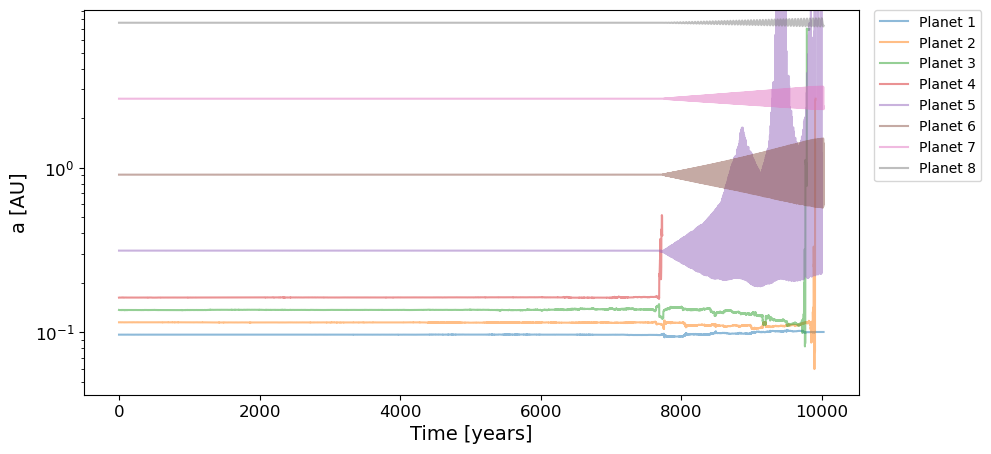

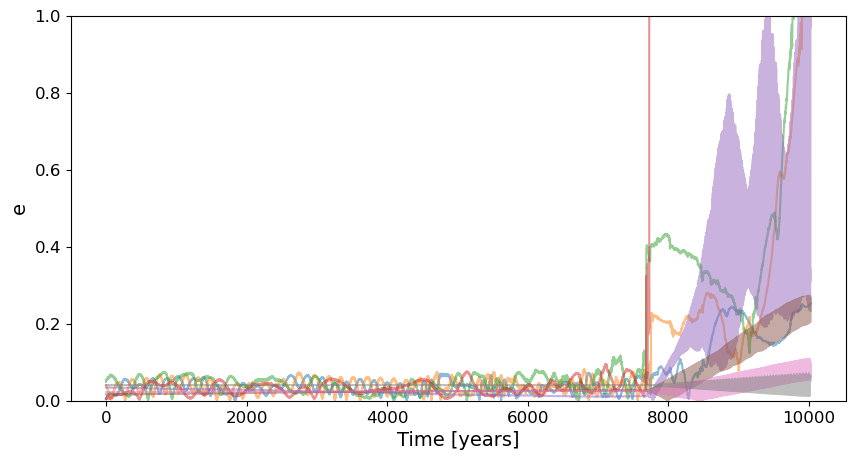

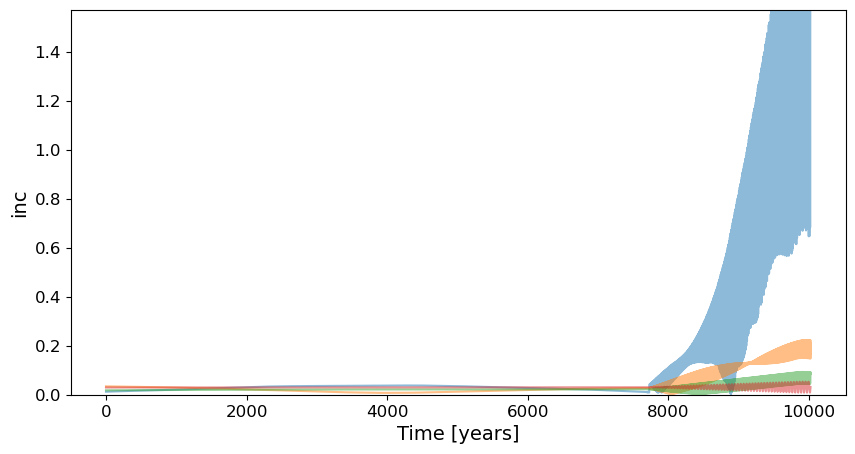

In [105]:
# Semi-major axis
fig = plt.figure(figsize = (10, 5))
for i in range(N_pl):
#    if i < 4: continue
    plt.plot(a_out[i][e_out[i] < 1], alpha = 0.5, label = "Planet " + str(i + 1)) 
    
plt.yscale('log')
plt.ylim(0, 1.2*a_arr[-1])
plt.xlabel('Time [years]', fontsize = 14)
plt.ylabel('a [AU]', fontsize = 14)
plt.tick_params(labelsize = 12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


# Eccentricity
fig = plt.figure(figsize = (10, 5))
for i in range(N_pl):
#    if i < 4: continue
    plt.plot(e_out[i], alpha = 0.5)
plt.ylim(0, 1)
plt.xlabel('Time [years]', fontsize = 14)
plt.ylabel('e', fontsize = 14)
plt.tick_params(labelsize = 12)


# Inclination
fig = plt.figure(figsize = (10, 5))
for i in range(N_pl):
    if i < 4: continue
    plt.plot(inc_out[i], alpha = 0.5)
plt.ylim(0, pi/2)
plt.xlabel('Time [years]', fontsize = 14)
plt.ylabel('inc', fontsize = 14)
plt.tick_params(labelsize = 12)


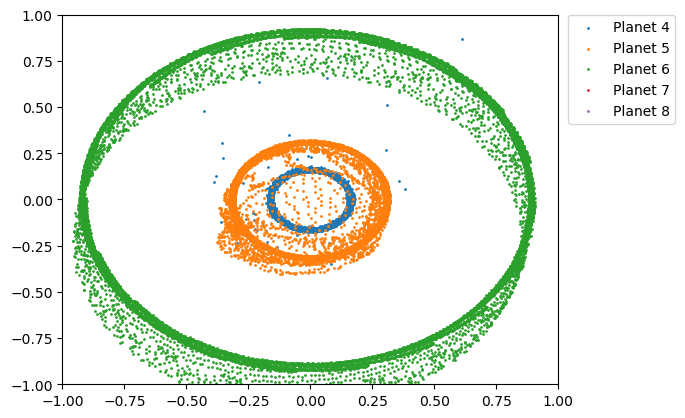

In [108]:
zoom = 1
# plt.scatter(x_out[4], y_out[4], s = 0.1)
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
#plt.xlim(-1000, 1000)
#plt.ylim(-1000, 1000)
# plt.xlim(-1000, 1000)
for i in range(8):
    if i < 3: continue
    plt.scatter(x_out[i], y_out[i], s = 1, label = "Planet " + str(i + 1))
    plt.xlim(-zoom, zoom)
    plt.ylim(-zoom, zoom)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

   